## Vertiefende Betrachtung der Merkmale

### Laden

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('df_PreiseStationenAngepasst.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

Ausschließen der Ausreißer

In [3]:
# Quelle: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_clean = df.copy()
for col in ['e5', 'e10', 'diesel']:
    df_clean = remove_outliers_iqr(df_clean, col)

print(f"Ursprüngliche Form: {df.shape}")
print(f"Bereinigte Form:   {df_clean.shape}")
df = df_clean

Ursprüngliche Form: (73589, 22)
Bereinigte Form:   (73096, 22)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73096 entries, 0 to 73588
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_uuid       73096 non-null  object 
 1   hour               73096 non-null  object 
 2   diesel             73096 non-null  float64
 3   e5                 73096 non-null  float64
 4   e10                73096 non-null  float64
 5   dieselchange       73096 non-null  float64
 6   e5change           73096 non-null  float64
 7   e10change          73096 non-null  float64
 8   brand              67604 non-null  object 
 9   city               73096 non-null  object 
 10  street             73096 non-null  object 
 11  house_number       73096 non-null  int64  
 12  name               73096 non-null  object 
 13  post_code          73096 non-null  int64  
 14  latitude           73096 non-null  float64
 15  longitude          73096 non-null  float64
 16  first_active       73096 no

## Preis nach Ort und Zeit

### Postleitzahl vs. Wochentag vs. Preis

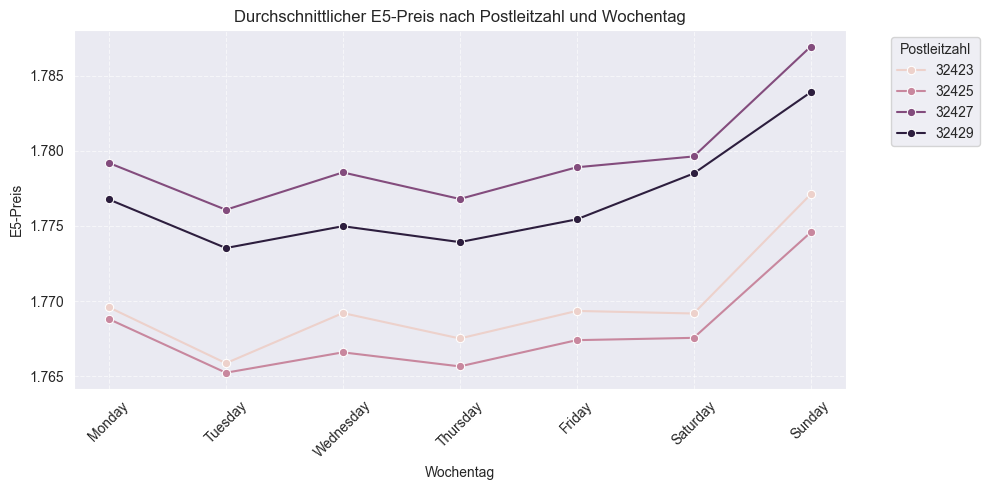

In [5]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['weekday'] = pd.Categorical(df['weekday'], ordered=True)

plz_weekday = df.groupby(['post_code', 'weekday'], observed=False)['e5'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=plz_weekday, x='weekday', y='e5', hue='post_code', marker='o')

plt.title('Durchschnittlicher E5-Preis nach Postleitzahl und Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('E5-Preis')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Postleitzahl', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Die Preise steigen zum Ende der Woche, mit dem höchsten Wert am Sonntag.
- Der geringste Wert ist am Dienstag.
- Es gibt Unterschiede bei den unterschiedlichen Postleitzahlen:
    - 32425 hat die niedrigsten E5 Preise, nahe 32423.
    - Mit etwas Abstand sind die E5 Preise von 32429 höher und am höchsten von 32427.

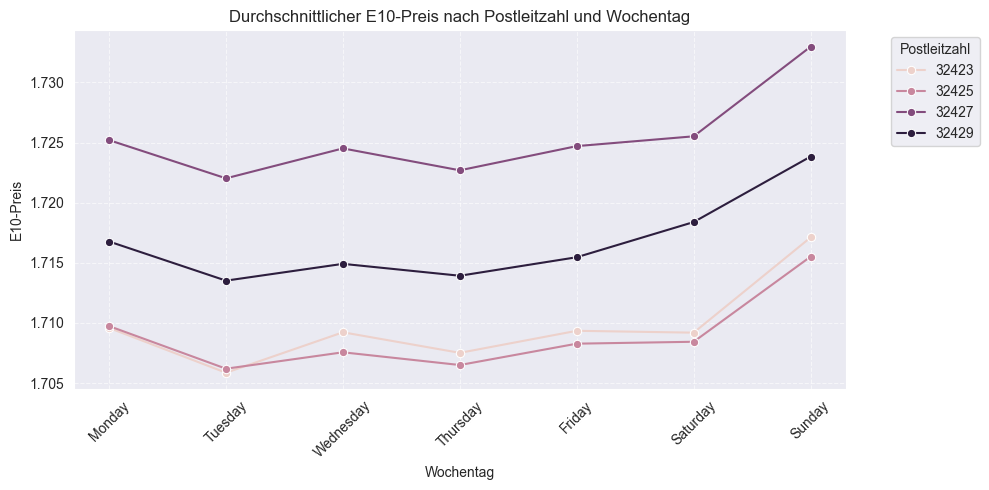

In [6]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['weekday'] = pd.Categorical(df['weekday'], ordered=True)

plz_weekday = df.groupby(['post_code', 'weekday'], observed=False)['e10'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=plz_weekday, x='weekday', y='e10', hue='post_code', marker='o')

plt.title('Durchschnittlicher E10-Preis nach Postleitzahl und Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('E10-Preis')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Postleitzahl', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Die Postleitzahlen 32423 und 32425 sind hier sehr ähnlich und nahe beieinander.
- 32429 liegt zwischen den 32427 und den unteren beiden Postleitzahlen.

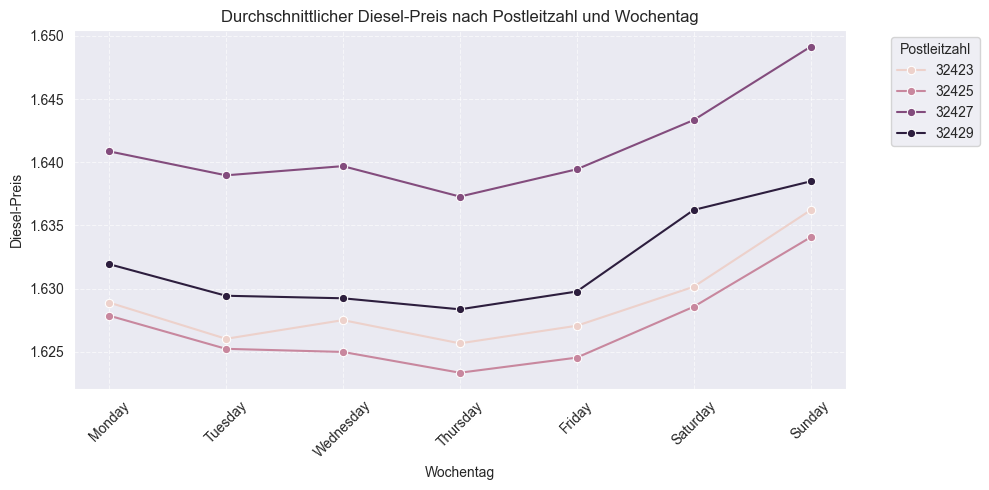

In [7]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['weekday'] = pd.Categorical(df['weekday'], ordered=True)

plz_weekday = df.groupby(['post_code', 'weekday'], observed=False)['diesel'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=plz_weekday, x='weekday', y='diesel', hue='post_code', marker='o')
plt.title('Durchschnittlicher Diesel-Preis nach Postleitzahl und Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Diesel-Preis')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Postleitzahl', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- 32427 ist am teursten und hat einen größeren Abstand zu den anderen Postleitzahlen.
- Der Preisanstieg bei 32429 ist von Freitag auf Samstag stärker, als bei den anderen Postleitzahlen.

### Postleitzahl vs. Stunde vs. Preis

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/1481290894.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


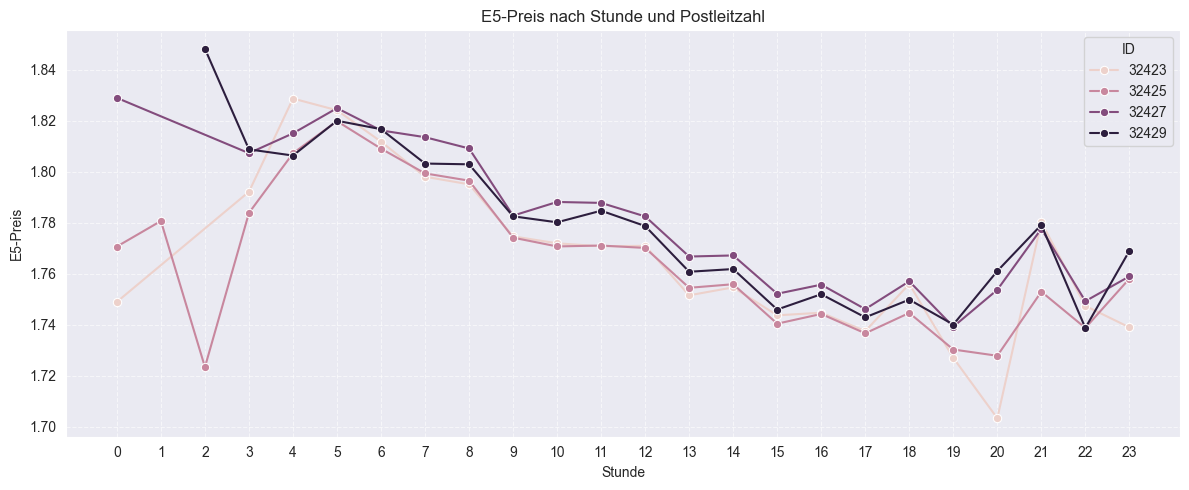

In [8]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['post_code', 'hour'], observed=False)['e5'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='e5', hue='post_code', marker='o', errorbar=None)
plt.title('E5-Preis nach Stunde und Postleitzahl')
plt.xlabel('Stunde')
plt.ylabel('E5-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Am frühen Morgen und am späten Abend sind die Preise bei den unterschiedlichen Postleitzahlen stärker auseinander.
    - Dies kann an den unterschiedlichen Öffnungszeiten der Tankstellen liegen
- Tagsüber gleichen sich die Verläufe der Preise aneinander an.
    - Am Morgen sind die Preise am höchsten und werden dann geringer.
    - Um 9 Uhr erreichen sie einen lokalen Tiefpunkt und steigen dann leicht, um dann gegen 11 Uhr wieder zu fallen.
    - Am Abend steigen die Preise und haben um 21 Uhr einen lokalen Hochpunkt.
    - Um 20 Uhr hat die Postleitzahl 32423 einen stärkeren Tiefpunkt als die anderen Postleitzahlen, um dann um 21 Uhr stark zu steigen und wieder auf das Niveau der anderen Tankstellen zu kommen.

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/4165313677.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


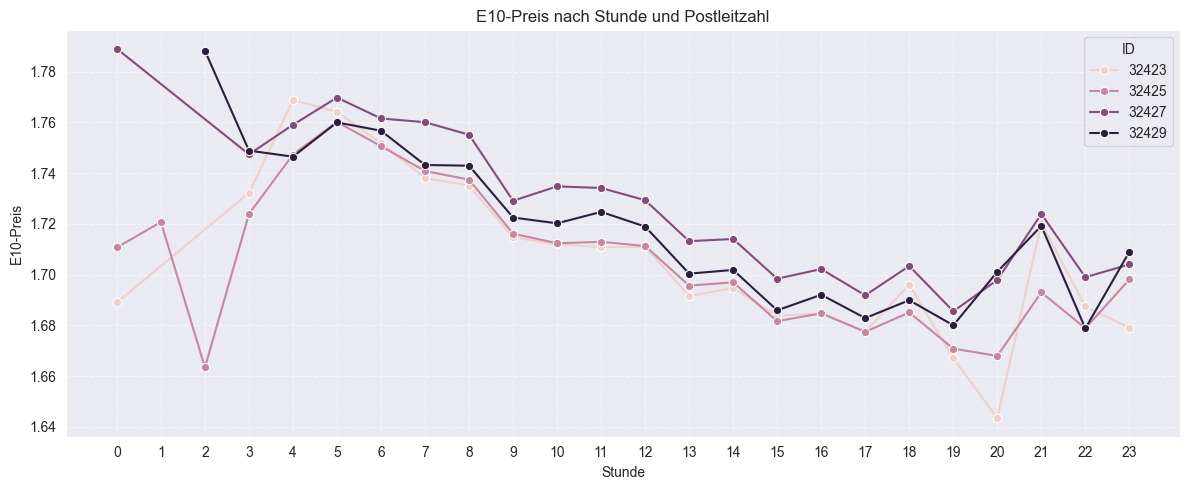

In [9]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['post_code', 'hour'], observed=False)['e10'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='e10', hue='post_code', marker='o', errorbar=None)
plt.title('E10-Preis nach Stunde und Postleitzahl')
plt.xlabel('Stunde')
plt.ylabel('E10-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- gleiche Beobachtungen, wie bei den E5-Preisen.

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/3835641805.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


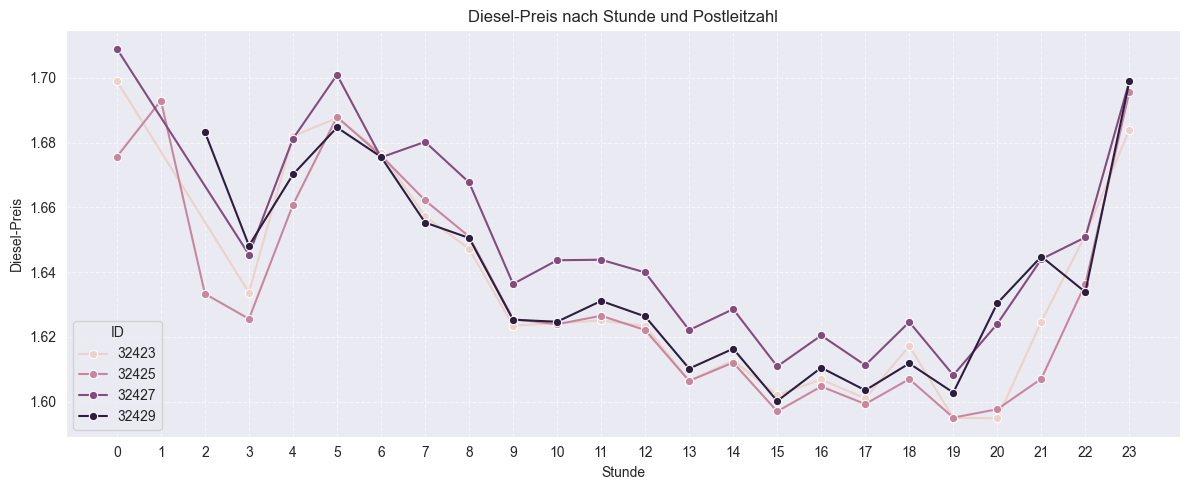

In [10]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['post_code', 'hour'], observed=False)['diesel'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='diesel', hue='post_code', marker='o', errorbar=None)
plt.title('Diesel-Preis nach Stunde und Postleitzahl')
plt.xlabel('Stunde')
plt.ylabel('Diesel-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Auch hier sind die Verläufe der Tankpreise von den unterschiedlichen Postleitzahlen sehr ähnlich zueinander.
- Unabhängig von der Postleitzahl ist der niedrigste Preis zwischen 18 und 19 Uhr.
- Ab ca. 20 Uhr steigen die Preise rapide an, besonders gegen 22–23 Uhr.
- 32427 scheint durchgehend leicht über den anderen zu liegen.
- Die Preise schwanken zwischen ca. 1.60€ und 1.71€, also um mehr als 10 Cent pro Liter im Tagesverlauf.

### Postleitzahl vs. Datum vs. Preis

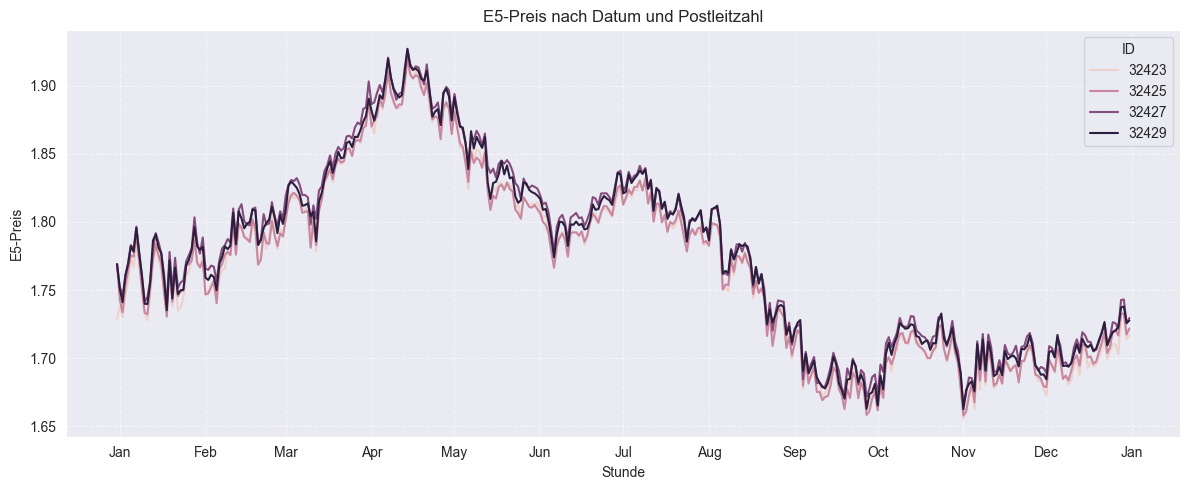

In [11]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
date_prices = df.groupby(['post_code', 'date'], observed=False)['e5'].mean().reset_index()
date_prices["date"] = pd.to_datetime(date_prices["date"]).dt.date

plt.figure(figsize=(12, 5))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=date_prices, x='date', y='e5', hue='post_code', errorbar=None)
plt.title('E5-Preis nach Datum und Postleitzahl')
plt.xlabel('Stunde')
plt.ylabel('E5-Preis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Die Preise steigen von Januar bis Mai, mit einem Höhepunkt im späten April / frühen Mai. Über 1,90€.
- Ab Mai/Juni beginnt ein klarer Preisrückgang, der bis September anhält.
- Der niedrigste Preis liegt etwa zwischen September und Oktober mit ca. 1,65–1,70€.
- Im November und Dezember steigen die Preise wieder leicht an.
- Die Preisverläufe in den PLZ-Bereichen 32423, 32425, 32427, 32429 sind nahezu gleich.
    - Kleine Unterschiede im Preisniveau

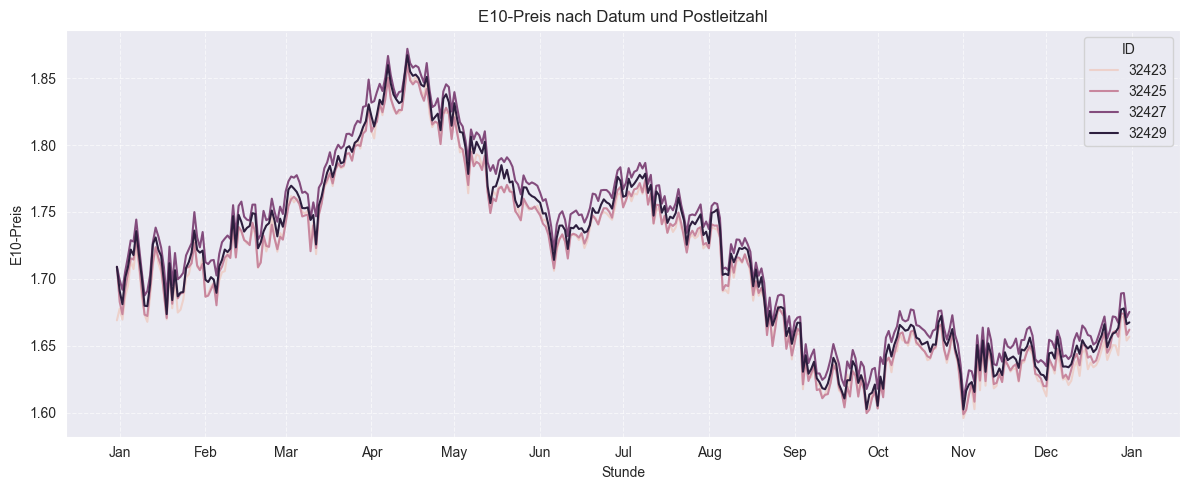

In [12]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
date_prices = df.groupby(['post_code', 'date'], observed=False)['e10'].mean().reset_index()
date_prices["date"] = pd.to_datetime(date_prices["date"]).dt.date

plt.figure(figsize=(12, 5))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=date_prices, x='date', y='e10', hue='post_code', errorbar=None)
plt.title('E10-Preis nach Datum und Postleitzahl')
plt.xlabel('Stunde')
plt.ylabel('E10-Preis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Auch hier ein Anstieg zwischen Januar bis April
- Ab Mai sinken die Preise kontinuierlich, bis sie im Herbst auf unter 1,60€ fallen.
- Wieder ein leichter Preisanstieg ab November/Dezember, analog zu E5.
- Die Postleitzahlen zeigen auch hier einen nahezu gleichen Verlauf auf leicht unterschiedlichen Preisniveaus.

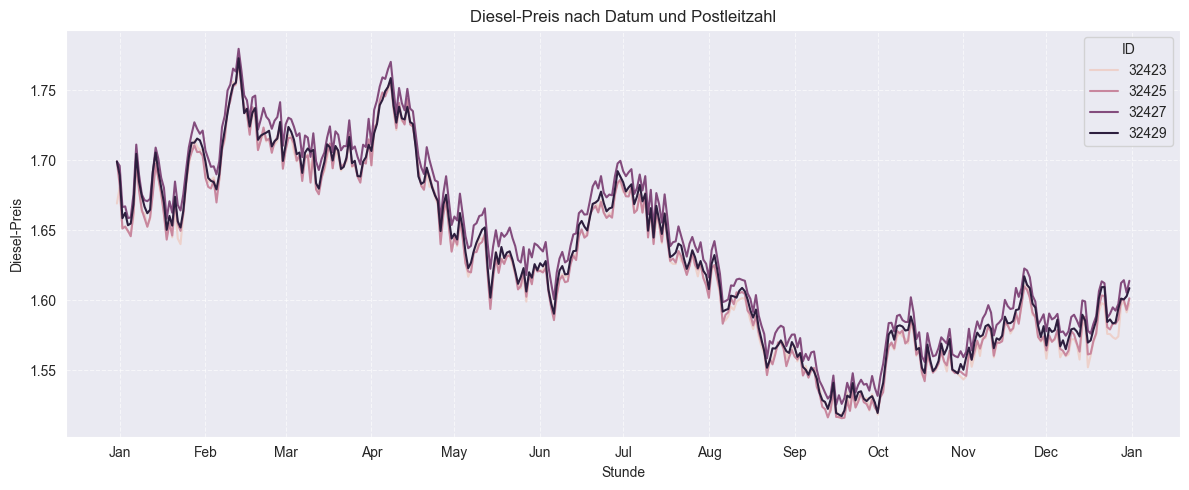

In [13]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
date_prices = df.groupby(['post_code', 'date'], observed=False)['diesel'].mean().reset_index()
date_prices["date"] = pd.to_datetime(date_prices["date"]).dt.date

plt.figure(figsize=(12, 5))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=date_prices, x='date', y='diesel', hue='post_code', errorbar=None)
plt.title('Diesel-Preis nach Datum und Postleitzahl')
plt.xlabel('Stunde')
plt.ylabel('Diesel-Preis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Anders als bei E5/E10 fällt der Peak nicht im April, sondern zwischen Mai und Juli.
- Auch Diesel fällt im späten Sommer und Herbst deutlich
- Wieder ähnlich zu E5/E10 ein Anstieg, aber etwas flacher.
- Auch hier verlaufen die Linien der Posteleitzahlen nahezu identisch.

## Preis nach Anbieter Ort und Zeit (check)

### ID vs. Stunde vs. Preis

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/4013166834.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


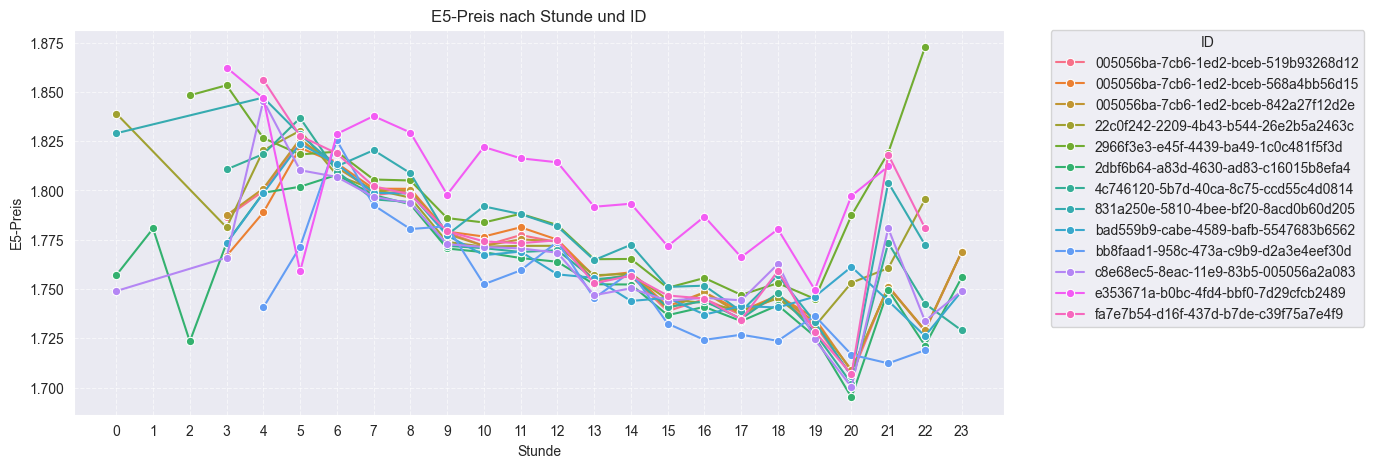

In [14]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['station_uuid', 'hour'], observed=False)['e5'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='e5', hue='station_uuid', marker='o', errorbar=None)
plt.title('E5-Preis nach Stunde und ID')
plt.xlabel('Stunde')
plt.ylabel('E5-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Der E5-Preis sinkt im Tagesverlauf typischerweise bis zum Nachmittag (gegen 14–15 Uhr) und steigt dann wieder an.
- Gegen 23 Uhr ist ein starker Preisanstieg sichtbar.
- Die Preise bewegen sich in einem engen Korridor (zwischen ca. 1,75 und 1,87 €), einzelne Ausreißer zeigen sich in den frühen Morgen- oder Abendstunden.
- Die meisten Kurven der Tankstellen überlagern sich stark. Die Tankstelle 'e35...' ist jedoch zu den meisten Zeitpunkten teurer, als die anderen Tankstellen.

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/607265667.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


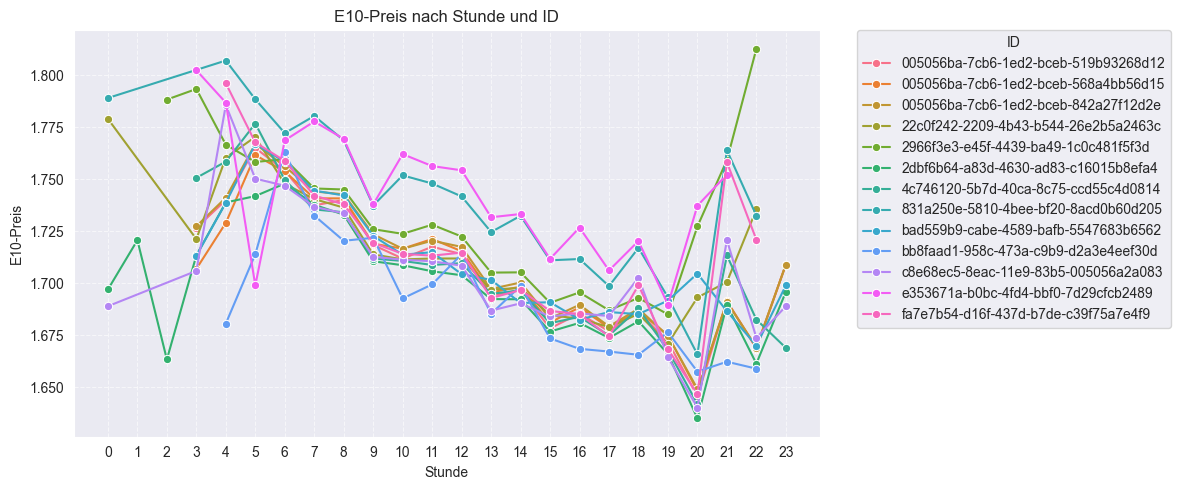

In [15]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['station_uuid', 'hour'], observed=False)['e10'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='e10', hue='station_uuid', marker='o', errorbar=None)
plt.title('E10-Preis nach Stunde und ID')
plt.xlabel('Stunde')
plt.ylabel('E10-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Ähnlich zu E5, die Preise sinken tagsüber und steigen am Abend wieder deutlich.
- Zwischen 4 und 19 Uhr gibt es ein relativ stabiles Preisniveau, danach steigen die Werte deutlich.
- Etwas weniger stark ausgeprägte Unterschiede als bei E5, die Linien verlaufen gleichmäßiger.
- Wieder sehr hohe Ausschläge gegen 23 Uhr bei einzelnen Tankstellen.
- Auch hier ist die Tankstelle 'e35...' zu den meisten Zeitpunkten am teuersten.

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/1105446522.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


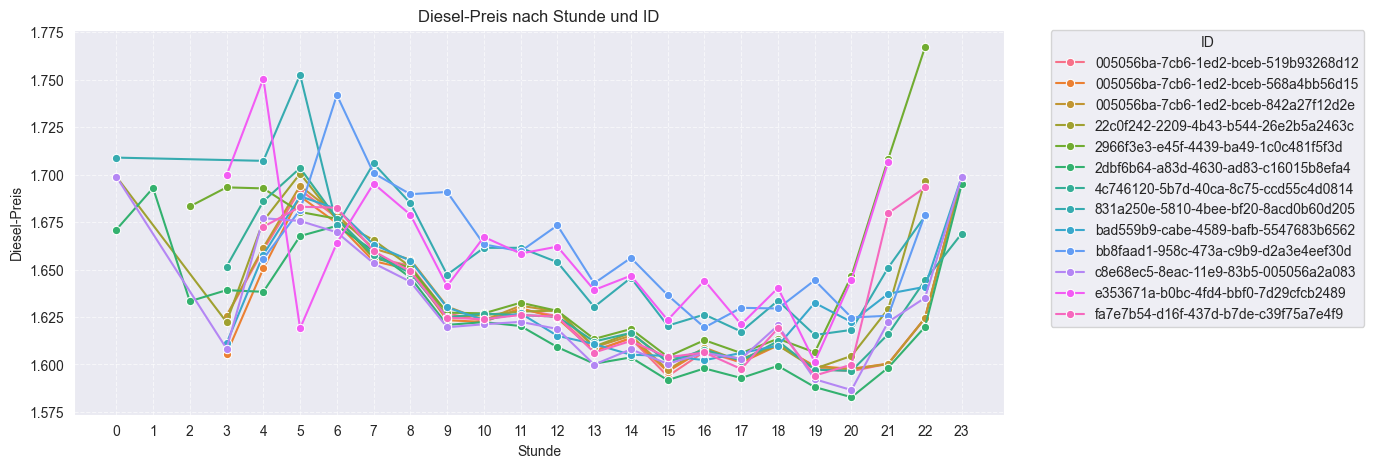

In [16]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['station_uuid', 'hour'], observed=False)['diesel'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='diesel', hue='station_uuid', marker='o', errorbar=None)
plt.title('Diesel-Preis nach Stunde und ID')
plt.xlabel('Stunde')
plt.ylabel('Diesel-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Preise am frühen Morgen (ca. 3 bis 5 Uhr) besonders niedrig, anschließend langsamer Anstieg bis zum Abend.
- Preisunterschiede zwischen den Tankstellen sind sichtbar, aber ebenfalls relativ gering.
- Ab ca. 20 Uhr steigen die Preise deutlich bei fast allen Tankstellen.

### ID, Wochentag, Preis

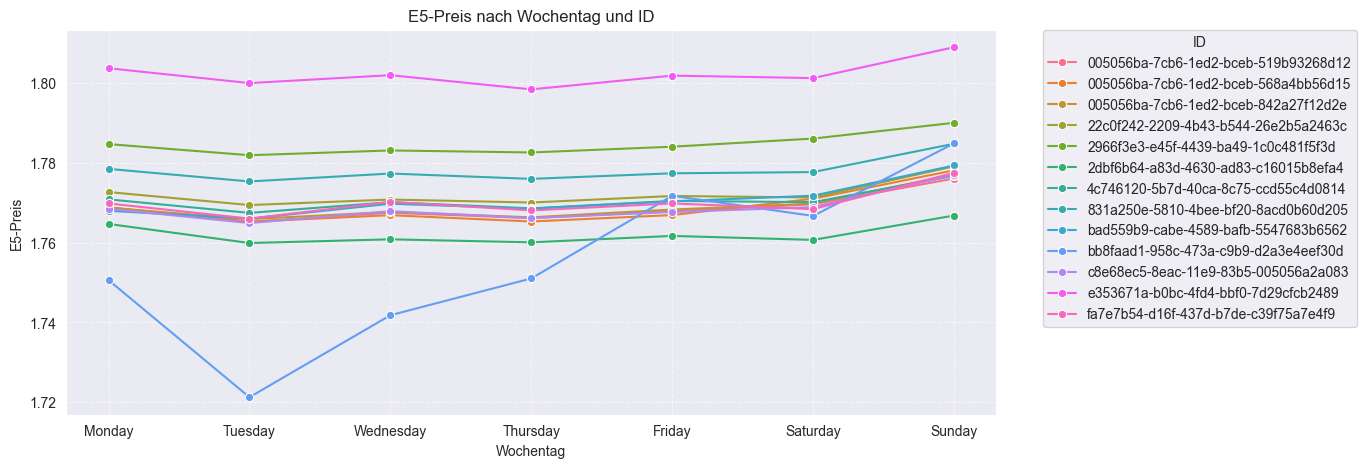

In [17]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
mean_weekday_brand = df.groupby(['station_uuid', 'weekday'], observed=False)['e5'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=mean_weekday_brand, x='weekday', y='e5', hue='station_uuid', marker='o', errorbar=None)
plt.title('E5-Preis nach Wochentag und ID')
plt.xlabel('Wochentag')
plt.ylabel('E5-Preis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Die meisten Tankstellen weisen unter der Woche (Montag bis Samstag) relativ stabile E5-Preise auf.
- Am Sonntag steigen die Preise bei fast allen IDs deutlich an. Dies könnte auf ein typisches Wochenendverhalten zurückzuführen sein.
- Einzelne Ausreißer (z.B. die blaue Linie unten) zeigen deutlich niedrigere Preise an bestimmten Tagen, was auf fehlerhafte Daten hindeuten könnte.
- Unterschiede zwischen Tankstellen sind insgesamt sichtbar, aber nicht extrem stark.

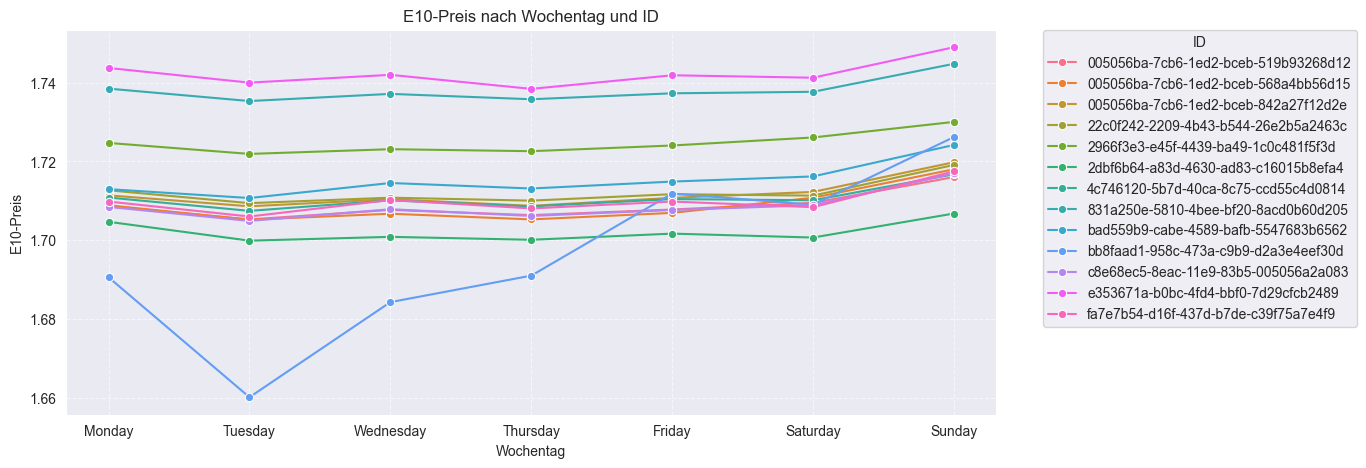

In [18]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
mean_weekday_brand = df.groupby(['station_uuid', 'weekday'], observed=False)['e10'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=mean_weekday_brand, x='weekday', y='e10', hue='station_uuid', marker='o', errorbar=None)
plt.title('E10-Preis nach Wochentag und ID')
plt.xlabel('Wochentag')
plt.ylabel('E10-Preis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Konstante Preise von Montag bis Samstag.
- Deutlicher Anstieg am Sonntag bei fast allen Tankstellen.
- Die Preisspanne zwischen den IDs ist etwas kleiner als die Preisspanne bei E5.
- Auch hier gibt es eine ID mit ungewöhnlich niedrigen Preisen unter der Woche (dunkelblaue Linie)

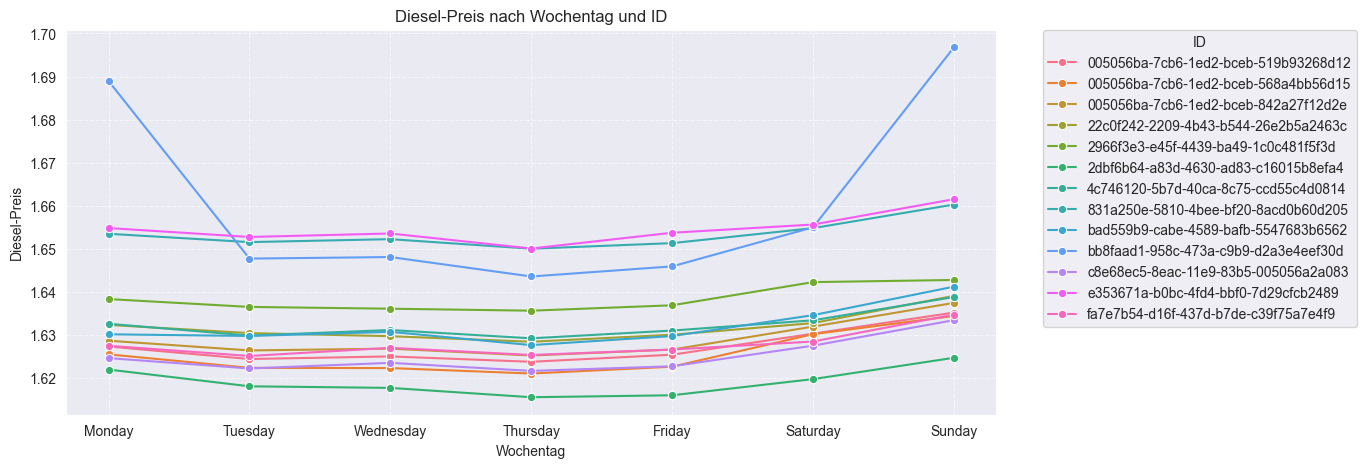

In [19]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
mean_weekday_brand = df.groupby(['station_uuid', 'weekday'], observed=False)['diesel'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=mean_weekday_brand, x='weekday', y='diesel', hue='station_uuid', marker='o', errorbar=None)
plt.title('Diesel-Preis nach Wochentag und ID')
plt.xlabel('Wochentag')
plt.ylabel('Diesel-Preis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='ID', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Dieselpreise zeigen konstante bis leicht sinkende Preise unter der Woche, dann starker Anstieg am Sonntag.
- Der Unterschied zwischen Wochentagen ist hier teilweise etwas stärker ausgeprägt als bei E5/E10.
- Es gibt eine auffällige ID mit sehr hohem Preis am Montag und Sonntag, während der Preis unter der Woche deutlich sinkt.
- Die Clusterbildung der Linien ist besonders bei Diesel klar sichtbar. Das deutet auf Gruppen von Tankstellen mit sehr ähnlichem Preisniveau und Verhalten hin.

### Brand, Stunde, Preis

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/2870050679.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


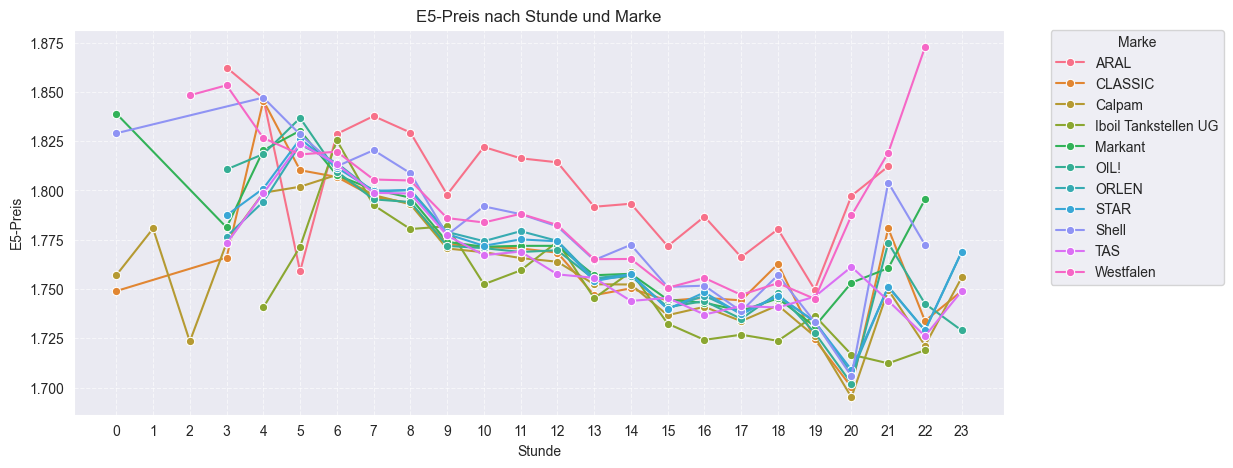

In [20]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['brand', 'hour'], observed=False)['e5'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='e5', hue='brand', marker='o', errorbar=None)
plt.title('E5-Preis nach Stunde und Marke')
plt.xlabel('Stunde')
plt.ylabel('E5-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Marke', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Die Linien zeigen die durchschnittlichen E5-Preise pro Stunde, gruppiert nach Tankstellenmarke.
- Leichter Rückgang tagsüber und Anstieg am Abend.
- Calpam zeigt ungewöhnlich niedrige Preise zwischen 0 und 3 Uhr und einen plötzlichen Anstieg ab 4 Uhr. Dies deutet auf  fehlerhafte Messwerte hin.

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/2952708763.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


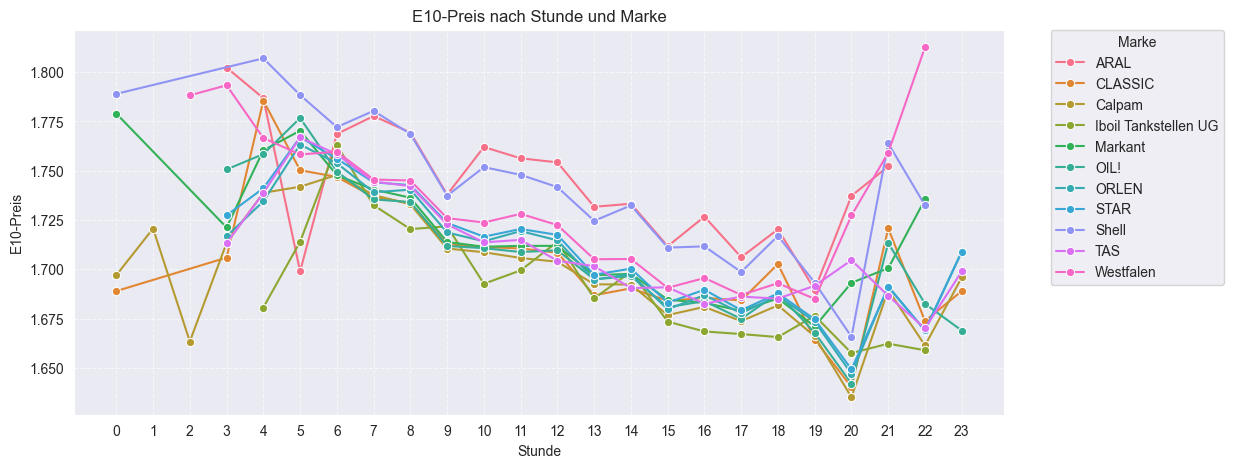

In [21]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['brand', 'hour'], observed=False)['e10'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='e10', hue='brand', marker='o', errorbar=None)
plt.title('E10-Preis nach Stunde und Marke')
plt.xlabel('Stunde')
plt.ylabel('E10-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Marke', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Die E10-Preise zeigen ein ähnliches Muster wie E5, mit tageszeitlicher Abnahme.
- Marken wie ARAL, Shell, Westfalen liegen im oberen Preisbereich.
- Wieder fällt Calpam durch extrem niedrige Preise nachts auf

/var/folders/_9/fyqnr96j0q7_tlytmj22wy8c0000gn/T/ipykernel_80915/1001757328.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour


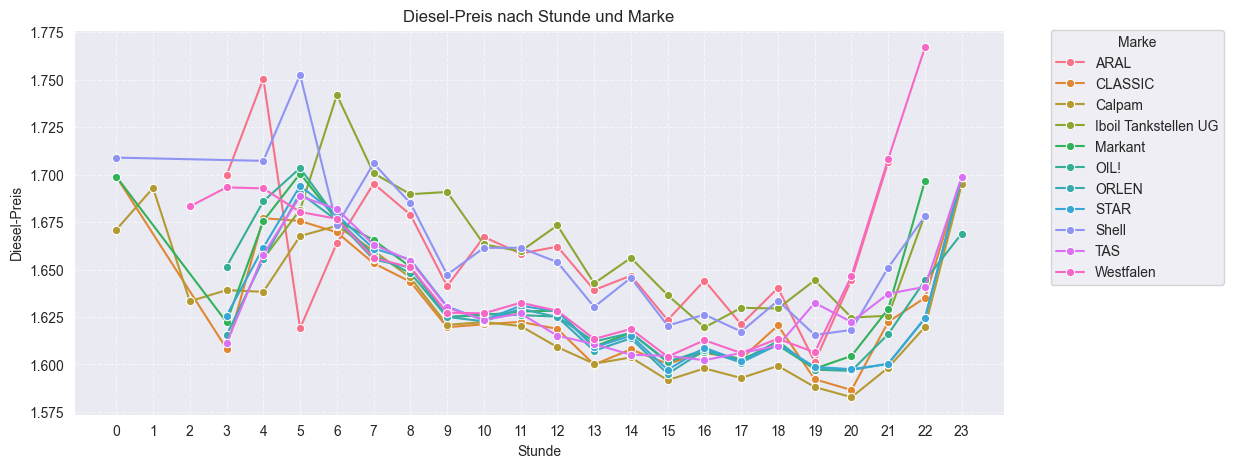

In [22]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.lineplot.html
hourly_prices = df.groupby(['brand', 'hour'], observed=False)['diesel'].mean().reset_index()
hourly_prices["hour"] = pd.to_datetime(hourly_prices["hour"]).dt.hour

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_prices, x='hour', y='diesel', hue='brand', marker='o', errorbar=None)
plt.title('Diesel-Preis nach Stunde und Marke')
plt.xlabel('Stunde')
plt.ylabel('Diesel-Preis')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Marke', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Auffälligkeiten:
- Nachts vor allem stabile Preise, ein Minimum am Nachmittag und steigende Preise ab ca. 20 Uhr.
- Auch hier ist Calpam ein Ausreißer mit unrealistisch tiefen Werten nachts.
- Westfalen, ARAL, Shell sind im oberen Preisbereich konstant.

## Öffnungszeiten im Kontext von Wochentag & Preis

### Wochentag, Öffnungzeit, Preis

Auffälligkeiten:
-

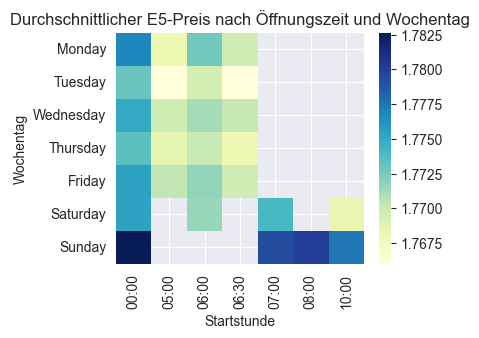

In [23]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = df.groupby(['weekday', 'start_time'], observed=False)['e5'].mean().unstack()

plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Durchschnittlicher E5-Preis nach Öffnungszeit und Wochentag")
plt.xlabel("Startstunde")
plt.ylabel("Wochentag")
plt.xticks(rotation=90)
plt.show()

Auffälligkeiten:
- Tankstellen mit früher Öffnungszeit (5 bis 7 Uhr) zeigen tendenziell höhere E5-Preise (speziell an Dienstagen und Donnerstagen).
- Tankstellen, die 24 Studen geöffnet haben, haben einen teureren Durchschnittspreis.

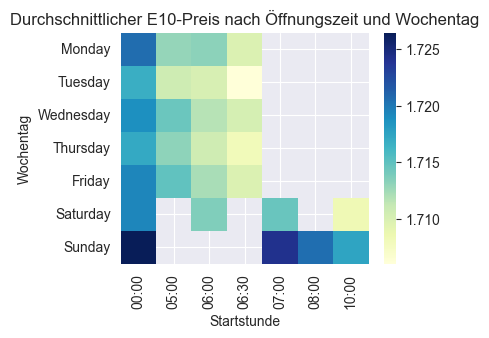

In [24]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = df.groupby(['weekday', 'start_time'], observed=False)['e10'].mean().unstack()

plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Durchschnittlicher E10-Preis nach Öffnungszeit und Wochentag")
plt.xlabel("Startstunde")
plt.ylabel("Wochentag")
plt.xticks(rotation=90)
plt.show()

Auffälligkeiten:
- Tankstellen, die rund um die Uhr geöffnet haben, sind tendenziell teurer (ausgenommen Sonntag).

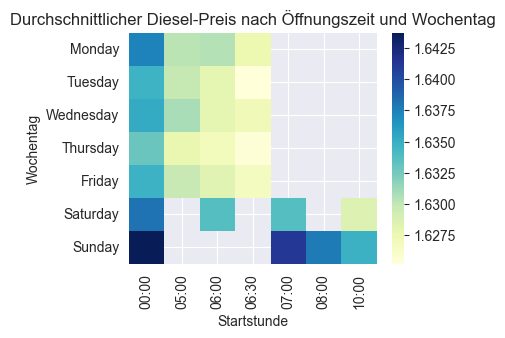

In [25]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = df.groupby(['weekday', 'start_time'], observed=False)['diesel'].mean().unstack()

plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Durchschnittlicher Diesel-Preis nach Öffnungszeit und Wochentag")
plt.xlabel("Startstunde")
plt.ylabel("Wochentag")
plt.xticks(rotation=90)
plt.show()

Auffälligkeiten:
- Tankstellen, die früh öffnen sind teurer, besonders Dienstag bis Donnerstag.

### Wochentag, Schließzeit, Preis

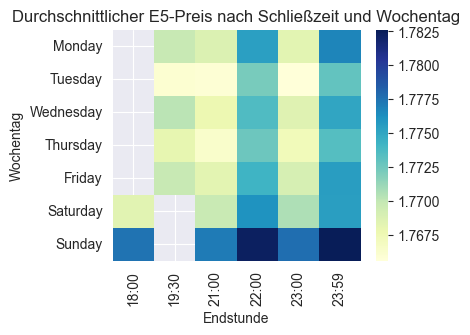

In [26]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = df.groupby(['weekday', 'end_time'], observed=False)['e5'].mean().unstack()

plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Durchschnittlicher E5-Preis nach Schließzeit und Wochentag")
plt.xlabel("Endstunde")
plt.ylabel("Wochentag")
plt.xticks(rotation=90)
plt.show()

Auffälligkeiten:
- Eine Tankstelle die früher schließt, hat einen tendenziell geringeren Preis.
- Tankstellen, die rund um die Uhr geöffnet sind, haben einen höheren Preis.

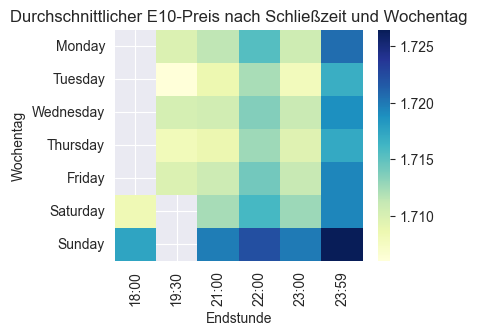

In [27]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = df.groupby(['weekday', 'end_time'], observed=False)['e10'].mean().unstack()

plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Durchschnittlicher E10-Preis nach Schließzeit und Wochentag")
plt.xlabel("Endstunde")
plt.ylabel("Wochentag")
plt.xticks(rotation=90)
plt.show()

Auffälligkeiten:
- Tankstellen die früher schließen haben günstigere Preise.
- 24 / 7 Tankstellen haben erhöhte Preise.

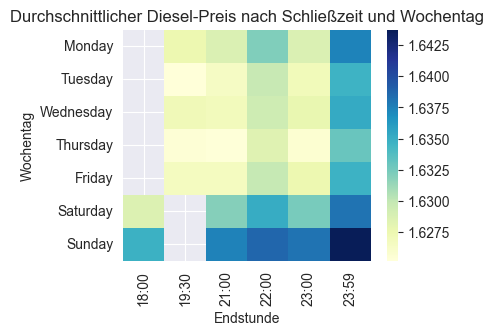

In [28]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)
heatmap_data = df.groupby(['weekday', 'end_time'], observed=False)['diesel'].mean().unstack()

plt.figure(figsize=(4, 3))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Durchschnittlicher Diesel-Preis nach Schließzeit und Wochentag")
plt.xlabel("Endstunde")
plt.ylabel("Wochentag")
plt.xticks(rotation=90)
plt.show()

Auffälligkeiten:
- Ähnliche Strukturen wie die anderen Kraftstoffe.

##  Preis + Änderung + Zeitpunkt

### Preis, Preischange und Stunde

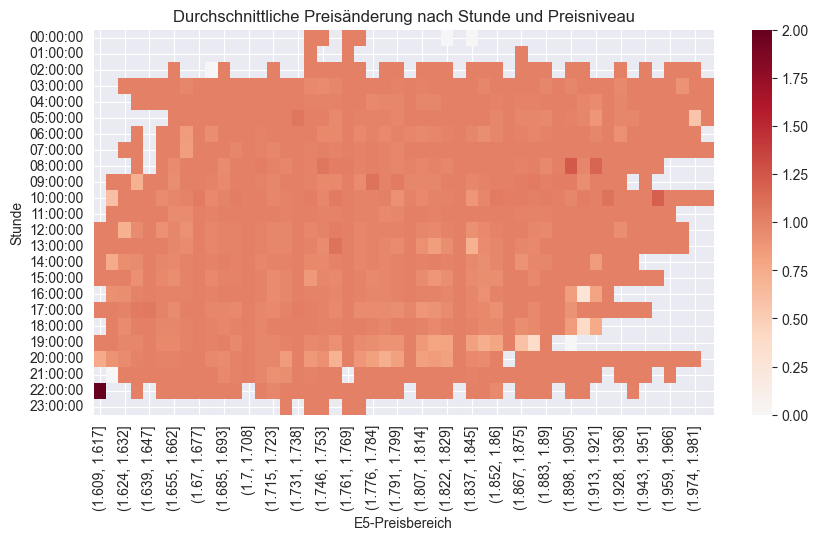

In [29]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
df['price_bin'] = pd.cut(df['e5'], bins=50)
heatmap_data = df.groupby(['hour', 'price_bin'], observed=False)['e5change'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0)
plt.title('Durchschnittliche Preisänderung nach Stunde und Preisniveau')
plt.xlabel('E5-Preisbereich')
plt.ylabel('Stunde')
plt.show()

Auffälligkeiten:
-  Die Preisänderungen finden fast durchgehend über den gesamten Tagesverlauf statt. Zwischen 05:00 und 22:00 Uhr ist besonders viel Aktivität sichtbar.
- Einzelne Zellen mit Werten nahe 2 treten sporadisch in niedrigen und mittleren Preisbereichen auf, insbesondere gegen 22 Uhr.
- In der Nacht (00:00 bis 04:00 Uhr) sind wenige Änderungen.
- Preisänderungen scheinen sich über fast alle Preisniveaus zu verteilen, allerdings sind in sehr hohen Preisbereichen (ab ca. 1.93 €) die Änderungen weniger häufig.

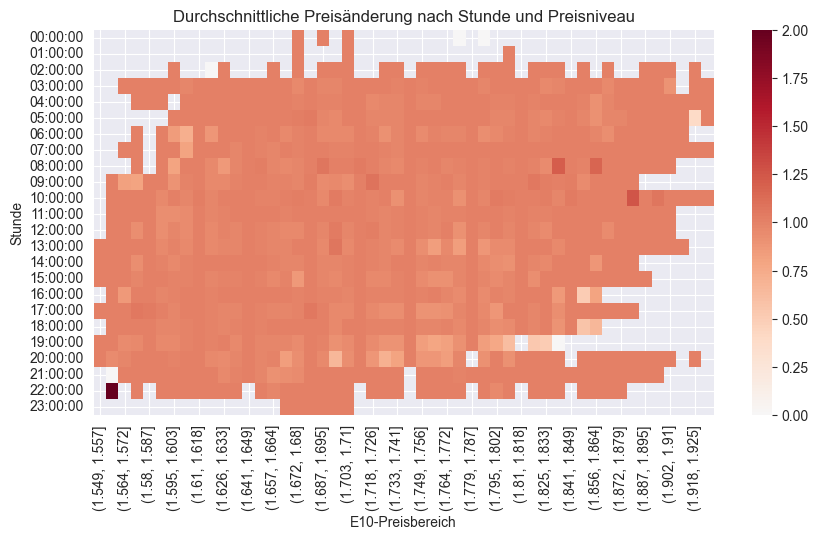

In [30]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
df['price_bin'] = pd.cut(df['e10'], bins=50)
heatmap_data = df.groupby(['hour', 'price_bin'], observed=False)['e10change'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0)
plt.title('Durchschnittliche Preisänderung nach Stunde und Preisniveau')
plt.xlabel('E10-Preisbereich')
plt.ylabel('Stunde')
plt.show()

Auffälligkeiten:
- Auch hier sind die meisten Preisänderungen im Bereich von 05:00 bis 22:00 Uhr sichtbar. Der Tagesverlauf ähnelt dem von E5 deutlich.
- Zwischen 22:00 und 23:00 Uhr gibt es ebenfalls eine deutliche Preisänderung in einem niedrigen Preisbereich.
- Die Intensität der Änderungen wirkt minimal schwächer als bei E5, wobei die Farbverteilung vergleichbar ist.

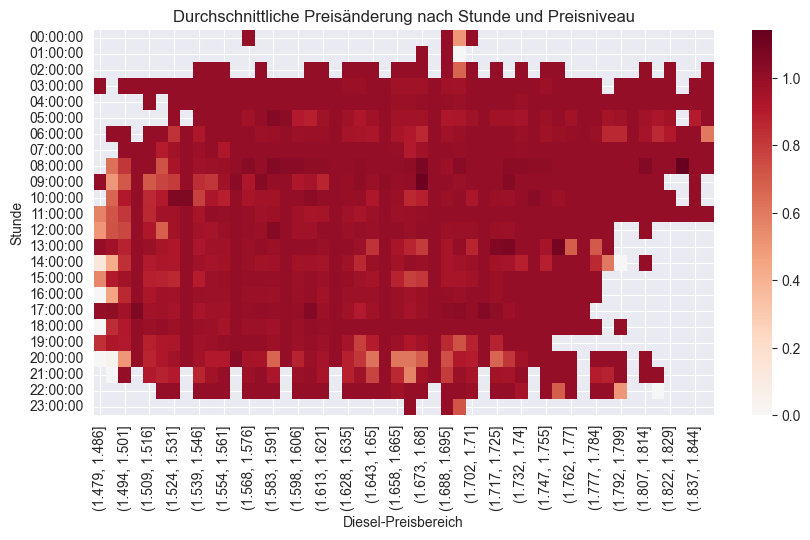

In [31]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
df['price_bin'] = pd.cut(df['diesel'], bins=50)
heatmap_data = df.groupby(['hour', 'price_bin'], observed=False)['dieselchange'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0)
plt.title('Durchschnittliche Preisänderung nach Stunde und Preisniveau')
plt.xlabel('Diesel-Preisbereich')
plt.ylabel('Stunde')
plt.show()

Auffälligkeiten:
- Die meiste Aktivität zeigt sich zwischen 06:00 bis 20:00 Uhr.
- Die Aktivität konzentriert sich tendenziell stärker auf die niedrigen bis mittleren Preisbereiche.
- Diesel zeigt eine dichtere Belegung des gesamten Plots mit Preisänderungen, was auf häufigere oder regelmäßigere Änderungen hindeutet.
- Achtung, andere Skala

### Preis, Preischange und wochentag

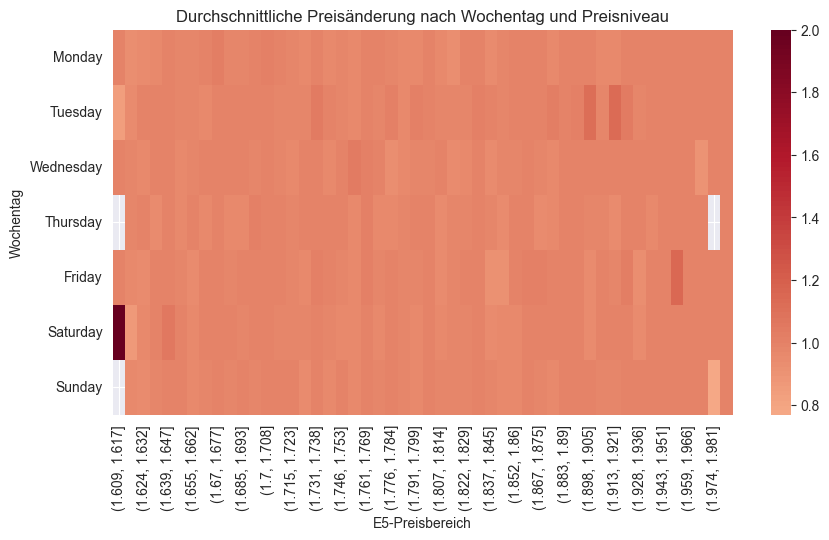

In [32]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
df['price_bin'] = pd.cut(df['e5'], bins=50)
heatmap_data = df.groupby(['weekday', 'price_bin'], observed=False)['e5change'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0)
plt.title('Durchschnittliche Preisänderung nach Wochentag und Preisniveau')
plt.xlabel('E5-Preisbereich')
plt.ylabel('Wochentag')
plt.show()

Auffälligkeiten:
- Samstags ist ein niedriges Preisniveau mit der höchsten durchschnittlichen Preisänderungen (dunkelpink).
- Donnerstags weist bei bestimmten Preisbereichen (um 1.87 bis 1.90) einen auffällig niedrigen Wert (dunkelblau/schwarz) auf, möglicherweise stabile Preise oder wenige Änderungen.
- Insgesamt moderate Schwankungen über alle Tage.

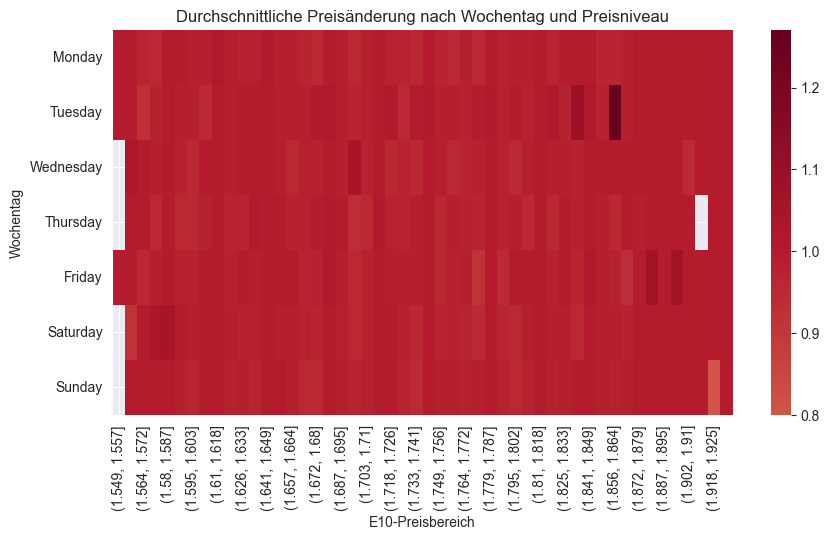

In [33]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
df['price_bin'] = pd.cut(df['e10'], bins=50)
heatmap_data = df.groupby(['weekday', 'price_bin'], observed=False)['e10change'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0)
plt.title('Durchschnittliche Preisänderung nach Wochentag und Preisniveau')
plt.xlabel('E10-Preisbereich')
plt.ylabel('Wochentag')
plt.show()

Auffälligkeiten:
- Donnerstag ebenfalls mit einem auffälligen dunklen Bereich bei hohen Preisniveau.
- Montag bis Mittwoch relativ gleich.

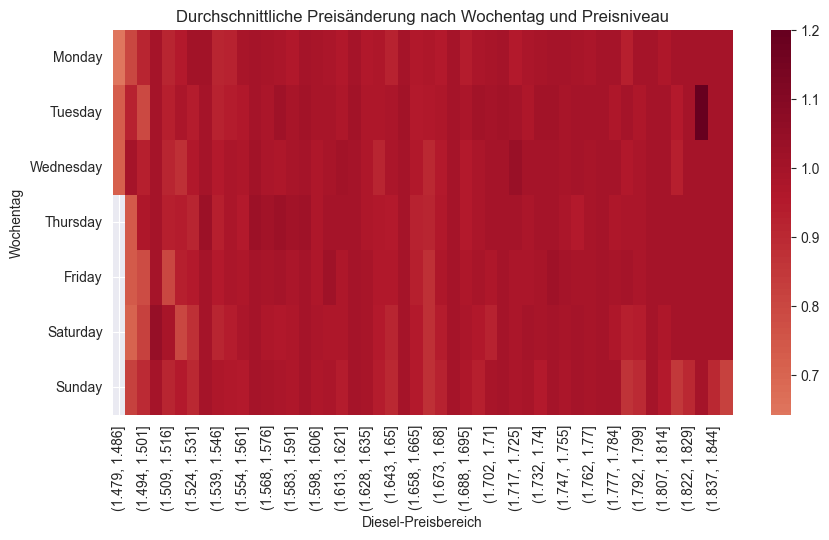

In [34]:
# Quelle: https://seaborn.pydata.org/generated/seaborn.heatmap.html
df['price_bin'] = pd.cut(df['diesel'], bins=50)
heatmap_data = df.groupby(['weekday', 'price_bin'], observed=False)['dieselchange'].mean().unstack()

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0)
plt.title('Durchschnittliche Preisänderung nach Wochentag und Preisniveau')
plt.xlabel('Diesel-Preisbereich')
plt.ylabel('Wochentag')
plt.show()

Auffälligkeiten:
- Keine starken Ausschläge, es könnte auf konstant kleine Preisänderungen hindeuten.
- Dienstag zeigt bei höherem Preisniveau teilweise etwas höhere Änderungen.

### Preis, Preischange und Datum

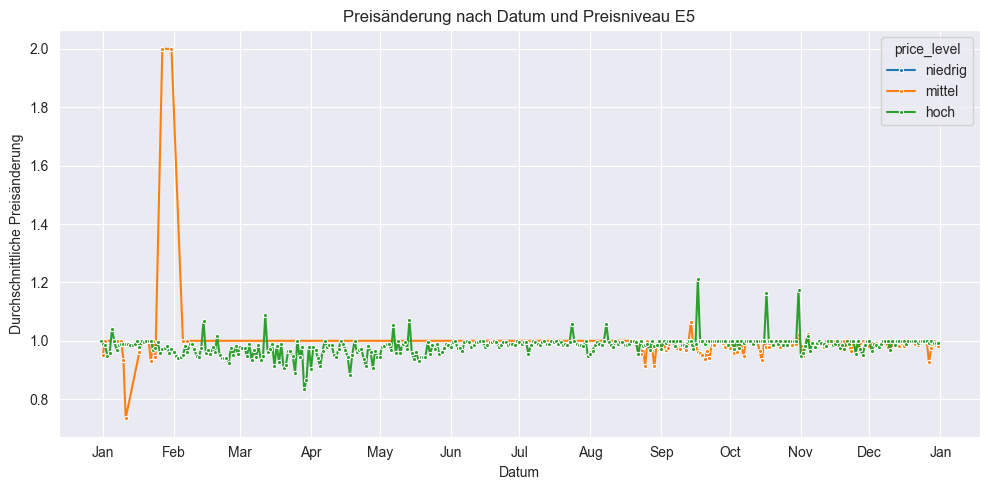

In [35]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
df['price_level'] = pd.cut(df['e5'], bins=[1.3, 1.5, 1.7, 1.9], labels=['niedrig', 'mittel', 'hoch'])
hourly_change = df.groupby(['date', 'price_level'], observed=False)['e5change'].mean().reset_index()
hourly_change["date"] = pd.to_datetime(hourly_change["date"]).dt.date

plt.figure(figsize=(10, 5))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=hourly_change, x='date', y='e5change', hue='price_level', marker='.')
plt.title('Preisänderung nach Datum und Preisniveau E5')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche Preisänderung')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Mittel-Preisniveau zeigt im Januar/Februar eine extreme Spitze bis zu einem Wert von 2.0, was auf eine sehr hohe Preisänderung an einzelnen Tagen hindeutet.
- Im weiteren Verlauf des Jahres bleiben die Unterschiede zwischen niedrig, mittel und hoch relativ gering

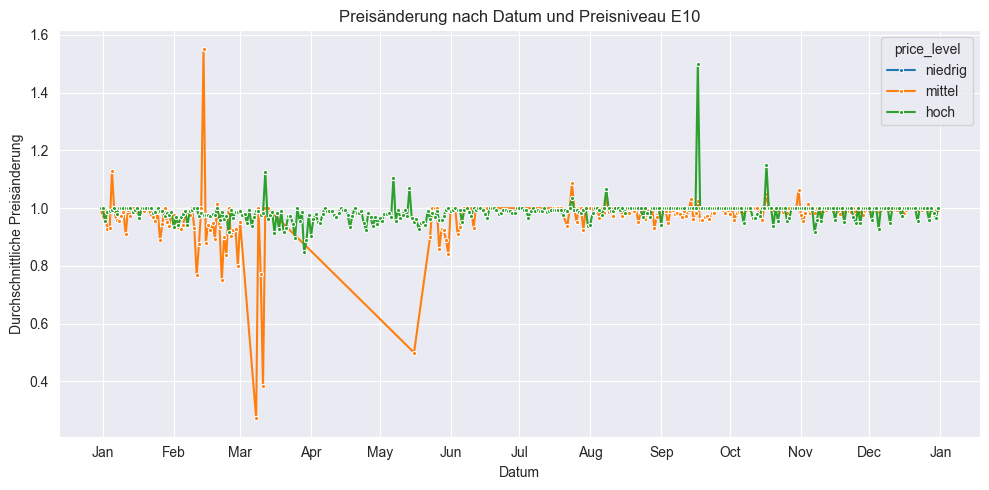

In [36]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
df['price_level'] = pd.cut(df['e10'], bins=[1.3, 1.5, 1.7, 1.9], labels=['niedrig', 'mittel', 'hoch'])
hourly_change = df.groupby(['date', 'price_level'], observed=False)['e10change'].mean().reset_index()
hourly_change["date"] = pd.to_datetime(hourly_change["date"]).dt.date

plt.figure(figsize=(10, 5))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=hourly_change, x='date', y='e10change', hue='price_level', marker='.')
plt.title('Preisänderung nach Datum und Preisniveau E10')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche Preisänderung')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Deutlich mehr Schwankungen bei Mittel im ersten Halbjahr (v. a. März/April), mit Werten bis runter zu 0.3, was auf starke Preisrückgänge hindeutet.
- Einzelne Spitzen nach oben bei Hoch im Oktober (1.5).
- Niedrig nicht vorhanden.

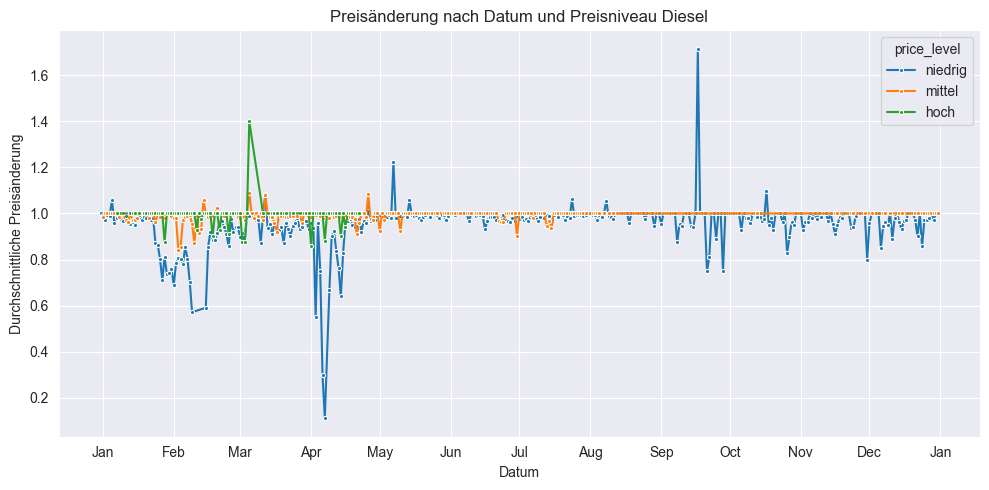

In [37]:
# Quellen: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html, https://seaborn.pydata.org/generated/seaborn.lineplot.html
df['price_level'] = pd.cut(df['diesel'], bins=[1.6, 1.7, 1.8, 1.9], labels=['niedrig', 'mittel', 'hoch'])
hourly_change = df.groupby(['date', 'price_level'], observed=False)['dieselchange'].mean().reset_index()
hourly_change["date"] = pd.to_datetime(hourly_change["date"]).dt.date

plt.figure(figsize=(10, 5))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Alle Monate markieren
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
sns.lineplot(data=hourly_change, x='date', y='dieselchange', hue='price_level', marker='.')

plt.title('Preisänderung nach Datum und Preisniveau Diesel')
plt.xlabel('Datum')
plt.ylabel('Durchschnittliche Preisänderung')
plt.tight_layout()
plt.show()

Auffälligkeiten:
- Niedrig schwankt deutlich stärker als die anderen Preisniveaus, insbesondere im Zeitraum Februar bis April und erneut im Herbst.
- Mittel verläuft fast konstant auf dem Niveau von 1.0, mit minimalen Abweichungen.
- Hoch ist relativ stabil, mit gelegentlichen Spitzen.